The objective of your final assignment is to implement three different multi-agent variations of the citylearn setting:


*   Decentralized  
*   Centralized
*   Semi-centralized (decentralized with communication)



For this purpose, you will use the CLAIR_grid repo, which is dedicated to the interface between citylearn and the different coordination mechanisms.


The repo can be found here [https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid/](https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid/).

Note that it is still work-in-progress and will be updated on the fly, as I receive feedback from you.

To use it, you need to first install the library (which will also install citylearn and some other libraries). Note that in this assignment, we are using citylearn only as a simulation environment. Everything that has to do with agency etc will be implemented by you.

In [ ]:
!pip install "git+https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid"

  Cloning https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid to /tmp/pip-req-build-xyxvg5qc
  Running command git clone --filter=blob:none --quiet https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid /tmp/pip-req-build-xyxvg5qc
  Resolved https://github.com/CLAIR-LAB-TECHNION/CLAIR_grid to commit 651ceeaba66c2c2534f46b1e5902918e9b12b6ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.5 MB/s eta 0:00:00
   

In [ ]:
!pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
citylearn 1.8.0 requires numpy==1.21.6, but you have numpy 1.25.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
plotnine 0.12.2 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.12.0 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


Your task is to support three different settings (centralized, decentralized, and decentralized with communication). For this, you will have to implement the different agents and the reward function.

To run the three settings, we need to import the relevant classes from clair_grid and citylearn.

In [ ]:
from clair_grid.coordination.sg_coordinator import SGDecentralizedCoordinator, SGCentralizedCoordinator, SGDecentralizedWithComCoordinator
from clair_grid.environment.citylearn_wrapper import CityLearnWrapper
from clair_grid.agents.agent import Agent

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction
from typing import List


In [ ]:
from clair_grid.agents.sg_random_agent import ESRandomAgent, CentralESRandomAgent
from citylearn.reward_function import SolarPenaltyReward

As you can see above, the library includes dummy implementations of random agents: ESRandomAgent ('ES' for electrical storage) for a single agent, and CentralESRandomAgent for the centralized setting.

In [ ]:
# create the environment
dataset_name = 'citylearn_challenge_2022_phase_1'
env = CityLearnEnv(dataset_name)
env.reward_function = SolarPenaltyReward(env)
env_wrapper = CityLearnWrapper(env)

# create the agents
num_of_agents = len(env.buildings)
agents = {}
agent_ids= range(1, num_of_agents+1)
for agent_id in  agent_ids:
  agent = ESRandomAgent(agent_id)
  agents[agent_id] = agent

# initialize the coodinator
b_random_order = False
coordinator = SGDecentralizedCoordinator(env_wrapper, agents, agent_ids, b_random_order)


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


After the agent is defined, we can train it as follows.

In [ ]:
# run training
coordinator.run(1000, b_log=True, b_train = True, b_evaluate=False)

To perform evaluation, we need to define the evaluation functions.

Our evaluation will consist of a step evaluation function, which will be activated at every iteration, and an aggregated evaluation function, which will use the collected data from the steps, to evaluate the overall performance.

You will receive the evaluation functions later on. In the meantime, below are dummy evaluation functions that demonstrate how they are defined.

In [ ]:
def dummy_step_evaluation_func(env_wrapper, step_data, joint_action)->dict:
    step_eval = {}
    step_eval["comfort"] = 5
    step_eval["CO2"] = -3
    return step_eval

In [ ]:
NET_CONS = -5

In [ ]:
def nc_step_evaluation_func(env_wrapper, step_data, joint_action)->dict:

    step_eval = {}
    obs = step_data[0]

    for index in range(len(env_wrapper.env.buildings)):
      print(obs[index])
      # considering the net consumption
      step_eval[index] = obs[index][NET_CONS]
      print(step_eval[index])
    return step_eval

In [ ]:
def dummy_agg_evaluation_func(evaluation_data:dict):
    total_scores = {}
    for iteration in evaluation_data:
        iteration_data = evaluation_data[iteration]
        for score_key in iteration_data:
            if not score_key in total_scores.keys():
                total_scores[score_key] = 0
            total_scores[score_key]+=iteration_data[score_key]
    return total_scores

In [ ]:
# run evaluation
print(coordinator.run(100, b_log=True, b_train = False, b_evaluate=True, step_evaluation_func=nc_step_evaluation_func, agg_evaluation_func=dummy_agg_evaluation_func))


[8, 1, 2, 19.7, 21.1, 22.2, 19.4, 78.0, 73.0, 73.0, 87.0, 0.0, 420.0, 683.0, 0.0, 0.0, 592.0, 291.0, 0.0, 0.1545025601953125, 0.8346000000000005, 0.0, 0.05032177527475095, 1.1881060751616346, 0.22, 0.22, 0.22, 0.22]
1.1881060751616346
[8, 1, 2, 19.7, 21.1, 22.2, 19.4, 78.0, 73.0, 73.0, 87.0, 0.0, 420.0, 683.0, 0.0, 0.0, 592.0, 291.0, 0.0, 0.1545025601953125, 1.1012500000000005, 0.0, 0.0, 1.1012500000000005, 0.22, 0.22, 0.22, 0.22]
1.1012500000000005
[8, 1, 2, 19.7, 21.1, 22.2, 19.4, 78.0, 73.0, 73.0, 87.0, 0.0, 420.0, 683.0, 0.0, 0.0, 592.0, 291.0, 0.0, 0.1545025601953125, 1.0083516438802096e-07, 0.0, 0.0, 1.0083516438802096e-07, 0.22, 0.22, 0.22, 0.22]
1.0083516438802096e-07
[8, 1, 2, 19.7, 21.1, 22.2, 19.4, 78.0, 73.0, 73.0, 87.0, 0.0, 420.0, 683.0, 0.0, 0.0, 592.0, 291.0, 0.0, 0.1545025601953125, 0.4758166666666665, 0.0, 0.13462303132954545, 1.4215317009998796, 0.22, 0.22, 0.22, 0.22]
1.4215317009998796
[8, 1, 2, 19.7, 21.1, 22.2, 19.4, 78.0, 73.0, 73.0, 87.0, 0.0, 420.0, 683.0, 0.0

Another way to run the training and evaluation is to use the functions that were created for this


In [ ]:
from clair_grid.evaluation import run_training, run_evaluation

In [ ]:
run_training(coordinator,1000, b_log=False)

In [ ]:
step_evaluation_func=dummy_step_evaluation_func
agg_evaluation_func=dummy_agg_evaluation_func

In [ ]:
num_of_evalutation_iterations = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
evaluation_scores = run_evaluation(coordinator,num_of_evalutation_iterations, b_log=False,  step_evaluation_func=step_evaluation_func, agg_evaluation_func=agg_evaluation_func)

In [ ]:
print(evaluation_scores)

{'comfort': 5000, 'CO2': -3000}


# Common functions

Common functions for coth agents:

In [ ]:
class Replay_buffer():
    '''
    Code based on:
    https://github.com/openai/baselines/blob/master/baselines/deepq/replay_buffer.py
    Expects tuples of (state, next_state, action, reward, done)
    '''
    def __init__(self, max_size=capacity):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self.storage = []
        self.max_size = max_size
        self.ptr = 0

    def push(self, data):
        if len(self.storage) == self.max_size:
            self.storage[int(self.ptr)] = data
            self.ptr = (self.ptr + 1) % self.max_size
        else:
            self.storage.append(data)

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        state: np.array
            batch of state or observations
        action: np.array
            batch of actions executed given a state
        reward: np.array
            rewards received as results of executing action
        next_state: np.array
            next state next state or observations seen after executing action
        done: np.array
            done[i] = 1 if executing ation[i] resulted in
            the end of an episode and 0 otherwise.
        """
        ind = np.random.randint(0, len(self.storage), size=batch_size)
        state, next_state, action, reward, done = [], [], [], [], []

        for i in ind:
            st, n_st, act, rew, dn = self.storage[i]
            state.append(np.array(st, copy=False))
            next_state.append(np.array(n_st, copy=False))
            action.append(np.array(act, copy=False))
            reward.append(np.array(rew, copy=False))
            done.append(np.array(dn, copy=False))

        return np.array(state), np.array(next_state), np.array(action), np.array(reward).reshape(-1, 1), np.array(done).reshape(-1, 1)

# Decenteralized agent related functions

In [ ]:
class Actor(nn.Module):
    """
    The Actor model takes in a state observation as input and
    outputs an action, which is a continuous value.

    It consists of four fully connected linear layers with ReLU activation functions and
    a final output layer selects one single optimized action for the state
    """
    def __init__(self, n_states, action_dim, hidden1):
        super(Actor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n_states, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, 1)
        )

    def forward(self, state):
        return self.net(state)

class Critic(nn.Module):
    """
    The Critic model takes in both a state observation and an action as input and
    outputs a Q-value, which estimates the expected total reward for the current state-action pair.

    It consists of four linear layers with ReLU activation functions,
    State and action inputs are concatenated before being fed into the first linear layer.

    The output layer has a single output, representing the Q-value
    """
    def __init__(self, n_states, action_dim, hidden2):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n_states + action_dim, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, action_dim)
        )

    def forward(self, state, action):
        return self.net(torch.cat((state, action), 1))

In [ ]:
import numpy as np
import random
import copy

class OU_Noise(object):
    """Ornstein-Uhlenbeck process.
    code from :
    https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
    The OU_Noise class has four attributes

        size: the size of the noise vector to be generated
        mu: the mean of the noise, set to 0 by default
        theta: the rate of mean reversion, controlling how quickly the noise returns to the mean
        sigma: the volatility of the noise, controlling the magnitude of fluctuations
    """
    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample.
        This method uses the current state of the noise and generates the next sample
        """
        dx = self.theta * (self.mu - self.state) + self.sigma * np.array([np.random.normal() for _ in range(len(self.state))])
        self.state += dx
        return self.state

In [ ]:
#Set Hyperparameters
# Hyperparameters adapted for performance from
capacity=1000000
batch_size=64
update_iteration=200
tau=0.001 # tau for soft updating
gamma=0.99 # discount factor
directory = './'
hidden1=20 # hidden layer for actor
hidden2=64. #hidden laye for critic

class DDPG(object):
    def __init__(self, state_dim, action_dim):
        """
        Initializes the DDPG agent.
        Takes three arguments:
               state_dim which is the dimensionality of the state space,
               action_dim which is the dimensionality of the action space, and
               max_action which is the maximum value an action can take.

        Creates a replay buffer, an actor-critic  networks and their corresponding target networks.
        It also initializes the optimizer for both actor and critic networks alog with
        counters to track the number of training iterations.
        """
        self.replay_buffer = Replay_buffer()

        self.actor = Actor(state_dim, action_dim, hidden1).to(device)
        self.actor_target = Actor(state_dim, action_dim,  hidden1).to(device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=3e-3)

        self.critic = Critic(state_dim, action_dim,  hidden2).to(device)
        self.critic_target = Critic(state_dim, action_dim,  hidden2).to(device)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=2e-2)
        # learning rate



        self.num_critic_update_iteration = 0
        self.num_actor_update_iteration = 0
        self.num_training = 0

    def select_action(self, state):
        """
        takes the current state as input and returns an action to take in that state.
        It uses the actor network to map the state to an action.
        """
        state = torch.FloatTensor(state.reshape(1, -1)).to(device)
        return self.actor(state).cpu().data.numpy().flatten()


    def update(self):
        """
        updates the actor and critic networks using a batch of samples from the replay buffer.
        For each sample in the batch, it computes the target Q value using the target critic network and the target actor network.
        It then computes the current Q value
        using the critic network and the action taken by the actor network.

        It computes the critic loss as the mean squared error between the target Q value and the current Q value, and
        updates the critic network using gradient descent.

        It then computes the actor loss as the negative mean Q value using the critic network and the actor network, and
        updates the actor network using gradient ascent.

        Finally, it updates the target networks using
        soft updates, where a small fraction of the actor and critic network weights are transferred to their target counterparts.
        This process is repeated for a fixed number of iterations.
        """

        for it in range(update_iteration):
            # For each Sample in replay buffer batch
            state, next_state, action, reward, done = self.replay_buffer.sample(batch_size)
            state = torch.FloatTensor(state).to(device)
            action = torch.FloatTensor(action).to(device)
            next_state = torch.FloatTensor(next_state).to(device)
            done = torch.FloatTensor(1-done).to(device)
            reward = torch.FloatTensor(reward).to(device)

            # Compute the target Q value
            target_Q = self.critic_target(next_state, self.actor_target(next_state))
            target_Q = reward + (done * gamma * target_Q).detach()

            # Get current Q estimate
            current_Q = self.critic(state, action)

            # Compute critic loss
            critic_loss = F.mse_loss(current_Q, target_Q)

            # Optimize the critic
            self.critic_optimizer.zero_grad()
            critic_loss.backward()
            self.critic_optimizer.step()

            # Compute actor loss as the negative mean Q value using the critic network and the actor network
            actor_loss = -self.critic(state, self.actor(state)).mean()

            # Optimize the actor
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()


            """
            Update the frozen target models using
            soft updates, where
            tau,a small fraction of the actor and critic network weights are transferred to their target counterparts.
            """
            for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)


            self.num_actor_update_iteration += 1
            self.num_critic_update_iteration += 1
    def save(self):
        """
        Saves the state dictionaries of the actor and critic networks to files
        """
        torch.save(self.actor.state_dict(), directory + 'actor.pth')
        torch.save(self.critic.state_dict(), directory + 'critic.pth')

    def load(self):
        """
        Loads the state dictionaries of the actor and critic networks to files
        """
        self.actor.load_state_dict(torch.load(directory + 'actor.pth'))
        self.critic.load_state_dict(torch.load(directory + 'critic.pth'))

# Decenteralized agent related functions

In [ ]:
class CentralizedQNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CentralizedQNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Your Task

You need to define your own agents and reward functions, using the code below.
You need to complete the functions that now contain 'pass'.

In [ ]:
class ESAgent(Agent):

    def __init__(self, agent_id):
        self.agent_id = agent_id
        number_of_states = 28
        number_of_actions = 1
        self.agent = DDPG(self.number_of_states, number_of_actions)

    def get_id(self):
        return self.agent_id

    def get_action(self, step_data):
      action = self.agent.select_action(step_data)
      return action + ou_noise.sample()

    def get_observation(self, step_data):
        pass

    def perform_training_step(self, action, step_data, env):
        pass

In [ ]:
class CentralESAgent(Agent):

    def __init__(self, agent_ids):
      self.agent_ids = agent_ids
      numbr


    def get_action(self, step_data):
      pass

    def get_observation(self, step_data):
      pass

    def perform_training_step(self, action, step_data):
      pass

In [ ]:
class CustomRewardD(RewardFunction):
    """Calculates custom user-defined reward.

    Parameters
    ----------
    env: citylearn.citylearn.CityLearnEnv
        CityLearn environment.
    """

    def __init__(self, env: CityLearnEnv):
        super().__init__(env)

    def calculate(self) -> List[float]:
       pass


In [ ]:
class CustomRewardC(RewardFunction):
    """Calculates custom user-defined reward.

    Parameters
    ----------
    env: citylearn.citylearn.CityLearnEnv
        CityLearn environment.
    """

    def __init__(self, env: CityLearnEnv):
        super().__init__(env)

    def calculate(self) -> List[float]:
           def __init__(self, env: CityLearnEnv, weight_consumption=1.0, weight_cost=1.0, weight_comfort=1.0):
        super().__init__(env)
        self.weight_consumption = weight_consumption
        self.weight_cost = weight_cost
        self.weight_comfort = weight_comfort

    def calculate(self) -> List[float]:
        # Basic reward based on electricity consumption and emission
        if self.env.central_agent:
            reward = [-self.weight_consumption * self.env.net_electricity_consumption_emission[-1]]
        else:
            reward = [-self.weight_consumption * b.net_electricity_consumption_emission[-1] for b in self.env.buildings]

        # Adjusting for energy cost
        if hasattr(self.env, 'electricity_pricing'):
            pricing = self.env.electricity_pricing[-1] if self.env.central_agent else [b.electricity_pricing[-1] for b in self.env.buildings]
            cost = np.multiply(reward, pricing)
            reward = np.add(reward, -self.weight_cost * cost)

        # Adjusting for comfort, assuming a metric like outdoor temperature is available
        # (You'll need to adapt this part based on available metrics in CityLearn)
        if hasattr(self.env, 'outdoor_dry_bulb_temperature'):
            outdoor_temp = self.env.outdoor_dry_bulb_temperature[-1] if self.env.central_agent else [b.outdoor_dry_bulb_temperature[-1] for b in self.env.buildings]
            comfort_penalty = np.abs(np.subtract(outdoor_temp, 22))
            reward = np.add(reward, -self.weight_comfort * comfort_penalty)

        return reward

In [ ]:
def com_signal_generator(env_wrapper, step_data):
    pass

# Project Evaluation

Your code will be evaluated using the code below. Of course, the number of iterations, dataset name, and evaluation functions will be defined later on.


In [ ]:
num_of_training_iterations = 1000
num_of_evalutation_iterations = 1000

In [ ]:
dataset_name = 'citylearn_challenge_2022_phase_1'

In [ ]:
step_evaluation_func=dummy_step_evaluation_func
agg_evaluation_func=dummy_agg_evaluation_func

Run Decentralized

In [ ]:
# create the environment
env = CityLearnEnv(dataset_name)
env.reward_function = CustomRewardD(env)
env_wrapper = CityLearnWrapper(env)

# create the agents
num_of_agents = len(env.buildings)
agents = {}
agent_ids= range(1, num_of_agents+1)
for agent_id in  agent_ids:
    agent = ESAgent(agent_id)
    agents[agent_id] = agent

# initialize the coodinator
b_random_order = False
sgd_coordinator = SGDecentralizedCoordinator(env_wrapper, agents, agent_ids, b_random_order)


In [ ]:
evaluation_scores = run_evaluation(sgd_coordinator,num_of_evalutation_iterations, b_log=False,  step_evaluation_func=step_evaluation_func, agg_evaluation_func=agg_evaluation_func)

In [ ]:
print(evaluation_scores)

Run Centralized

In [ ]:
# create the environment
env = CityLearnEnv(dataset_name)
env.reward_function = CustomRewardC(env)
env_wrapper = CityLearnWrapper(env)

# create the agents
num_of_agents = len(env.buildings)
agents = {}
agent_ids= range(1, num_of_agents+1)
for agent_id in  agent_ids:
    agent = ESAgent(agent_id)
    agents[agent_id] = agent

# create central agent
central_agent = CentralESAgent(agent_ids)

# initialize the coodinator
b_random_order = False
sgc_coordinator = SGCentralizedCoordinator(env_wrapper, agents, agent_ids, central_agent)


In [ ]:
run_training(sgc_coordinator,num_of_training_iterations, b_log=False)

In [ ]:
evaluation_scores = run_evaluation(sgc_coordinator,num_of_evalutation_iterations, b_log=False,  step_evaluation_func=step_evaluation_func, agg_evaluation_func=agg_evaluation_func)

Run Decentralized with Communication

In [ ]:
# create the environment
dataset_name = 'citylearn_challenge_2022_phase_1'
env = CityLearnEnv(dataset_name)
env.reward_function = SolarPenaltyReward(env)
env_wrapper = CityLearnWrapper(env)

# create the agents
num_of_agents = len(env.buildings)
agents = {}
agent_ids= range(1, num_of_agents+1)
for agent_id in  agent_ids:
    agent = ESRandomAgent(agent_id)
    agents[agent_id] = agent

# initialize the coodinator
b_random_order = False
sgcc_coordinator = SGDecentralizedWithComCoordinator(env_wrapper, agents, agent_ids, b_random_order, com_signal_generator)


In [ ]:
run_training(sgcc_coordinator,num_of_training_iterations, b_log=False)

In [ ]:
evaluation_scores = run_evaluation(sgcc_coordinator,num_of_evalutation_iterations, b_log=False,  step_evaluation_func=step_evaluation_func, agg_evaluation_func=agg_evaluation_func)

# Important notes!

* You can add imports to the submitted notebook or install your own repo. However, the code that will be run is given above in the Project Evaluation
section. You cannot change it.

* If you find problems or errors in the code, please let me know.

* The description pf the project might change to help clarify it, but the core of the assignment will not.




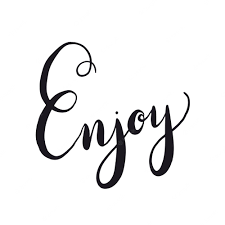